In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

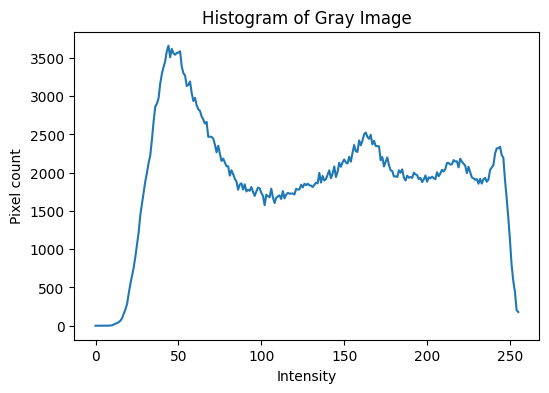

In [3]:
img = cv2.imread("noisy.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Khao sat histogram gray image
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.title("Histogram of Gray Image")
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.show()

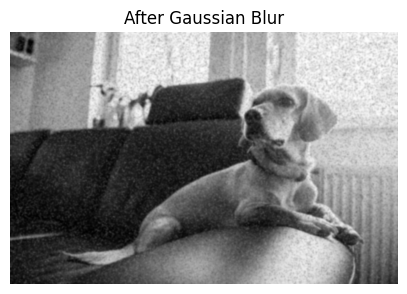

In [18]:
#làm mờ để giảm nhiễu
kernel = (9, 9)
sigma = 1.4

blur = cv2.GaussianBlur(gray, kernel, sigma)
show("After Gaussian Blur", blur)

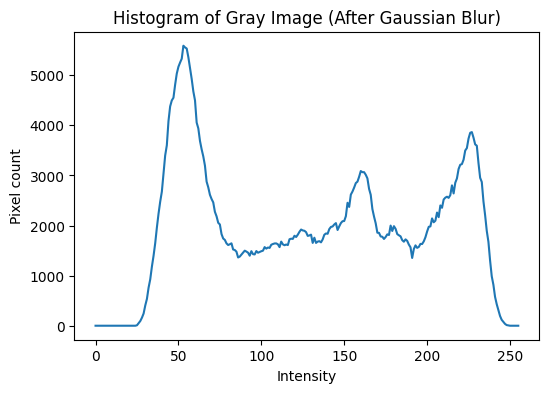

In [17]:
#histogram sau khi giảm nhiễu
hist_blur = cv2.calcHist([blur], [0], None, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist_blur)
plt.title("Histogram of Gray Image (After Gaussian Blur)")
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.show()

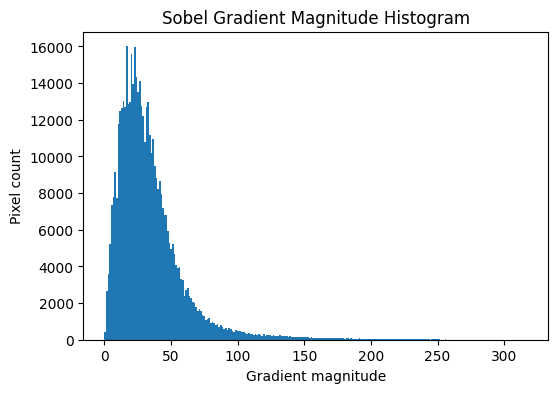

In [ ]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

grad_mag = np.sqrt(sobelx**2 + sobely**2)

plt.figure(figsize=(6,4))
plt.hist(grad_mag.ravel(), bins=256)
plt.title("Sobel Gradient Magnitude Histogram")
plt.xlabel("Gradient magnitude")
plt.ylabel("Pixel count")
plt.show()


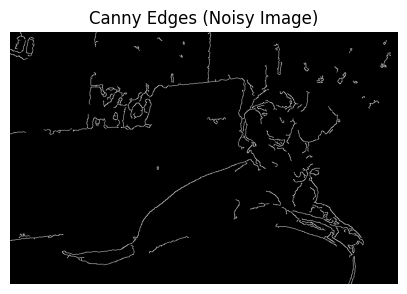

In [7]:
low_thresh = 50
high_thresh = 150

edges = cv2.Canny(blur, low_thresh, high_thresh)

show("Canny Edges (Noisy Image)", edges)


ĐÁNH GIÁ KẾT QUẢ
Đối với ảnh có nhiều nhiễu, trước khi phát hiện biên thì phải áp dụng bộ lọc Gaussian. Lúc đó thì nhiễu cao tần sẽ được giảm đáng kể trong khi các biên thật vẫn được bảo toàn tương đối tốt. Thuật toán Canny khi đặt low threshold và high threshold phù hợp thì sẽ loại bỏ được nhiều cạnh giả do nhiễu và chỉ giữ lại các biên có ý nghĩa.